Connected Successfully
Missing Values:
 id                0
name              0
gender            0
attendance        0
study_hours       0
previous_score    0
final_score       0
dtype: int64

Statistical Summary:
               id  attendance  study_hours  previous_score  final_score
count  30.000000   30.000000    30.000000       30.000000    30.000000
mean   15.500000   78.833333     3.486667       72.133333    75.200000
std     8.803408   11.477364     1.101326        9.891596    12.712741
min     1.000000   55.000000     1.500000       50.000000    48.000000
25%     8.250000   70.250000     2.650000       66.250000    66.000000
50%    15.500000   81.000000     3.450000       72.500000    77.000000
75%    22.750000   88.750000     4.175000       78.750000    84.500000
max    30.000000   95.000000     5.500000       88.000000    94.000000


C:\Users\Bhoomika HP\AppData\Local\Temp\ipykernel_9088\1372334078.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM students", conn)     #load data


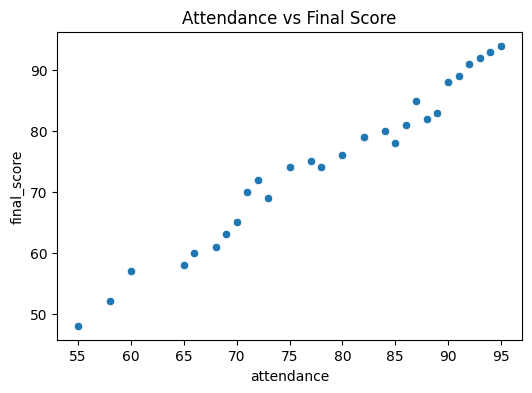

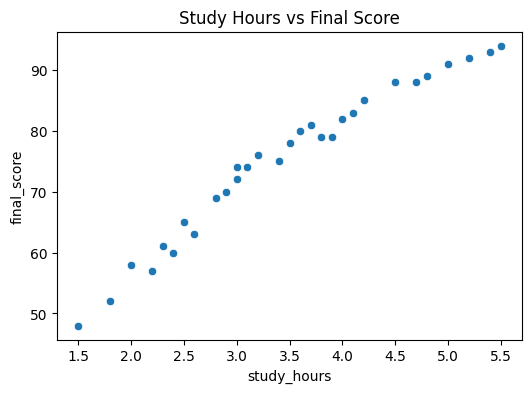

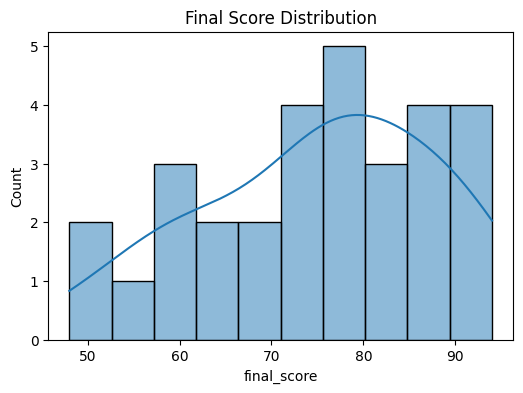

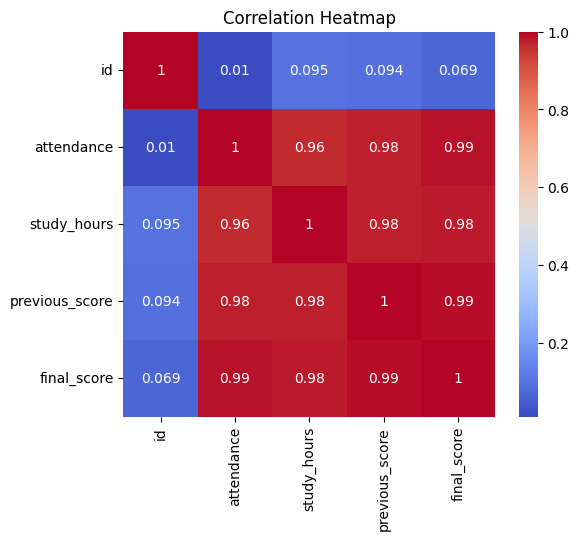

In [12]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(              # Connect to MySQL 
    host="localhost",
    user="root",
    password="root123",
    database="student_analysis"
)

print("Connected Successfully")

df = pd.read_sql("SELECT * FROM students", conn)     #load data
df.head()


print("Missing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())



correlation = df.corr(numeric_only=True)
correlation


plt.figure(figsize=(6,4))
sns.scatterplot(x="attendance", y="final_score", data=df)
plt.title("Attendance vs Final Score")
plt.show()



plt.figure(figsize=(6,4))
sns.scatterplot(x="study_hours", y="final_score", data=df)
plt.title("Study Hours vs Final Score")
plt.show()



plt.figure(figsize=(6,4))
sns.histplot(df["final_score"], bins=10, kde=True)
plt.title("Final Score Distribution")
plt.show()



plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
import os

X = df[['attendance', 'study_hours', 'previous_score']]
y = df['final_score']

X.head()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

y_pred

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))




model_path = os.path.join(os.getcwd(), "model")
os.makedirs(model_path, exist_ok=True)


file_path = os.path.join(model_path, "student_model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", file_path)




Training data: (24, 3)
Testing data: (6, 3)
R2 Score: 0.9768104476529166
MAE: 0.8214418919281385
MSE: 0.793598013655744
Model saved at: C:\Users\Bhoomika HP\Desktop\Student_Performance_Analysis\model\student_model.pkl
